In [6]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

A) Commençons par démontrer que la matrice $\bm{H}$ est orthogonale. Par définition, une matrice est orthogonale si $\bm{H}^T\bm{H}=\bm{I}$, où $\bm{I}$ est la matrice identité.

$$\bm{H}^T\bm{H}=\bm{I}$$
$$\bigg[\bm{I}-\frac{2\bm{v}\bm{v}^T}{\bm{v}^T\bm{v}}\bigg]^T \bigg[\bm{I}-\frac{2\bm{v}\bm{v}^T}{\bm{v}^T\bm{v}}\bigg]=\bm{I}$$

En utilisant les propriétés suivantes:\
1)$(\bm{A}-\bm{B})^T=\bm{A}^T-\bm{B}^T$\
2) $(\bm{v}\bm{v}^T)^T=(\bm{v}^T)^T\bm{v}^T=\bm{v}\bm{v}^T$\
3) $(\bm{v}^T\bm{v})^T=\bm{v}^T(\bm{v}^T)^T=\bm{v}^T\bm{v}$\
\
Il en découle que : 
$$\bigg[\bm{I}^T-\frac{2(\bm{v}\bm{v}^T)^T}{(\bm{v}^T\bm{v})^T}\bigg] \bigg[\bm{I}-\frac{2\bm{v}\bm{v}^T}{\bm{v}^T\bm{v}}\bigg]=\bigg[\bm{I}-\frac{2\bm{v}\bm{v}^T}{\bm{v}^T\bm{v}}\bigg] \bigg[\bm{I}-\frac{2\bm{v}\bm{v}^T}{\bm{v}^T\bm{v}}\bigg]$$
$$\bm{I}-\frac{2\bm{v}\bm{v}^T}{\bm{v}^T\bm{v}}-\frac{2\bm{v}\bm{v}^T}{\bm{v}^T\bm{v}}+\frac{4\bm{v}\bm{v}^T \bm{v}\bm{v}^T}{(\bm{v}^T\bm{v})^2}=\bm{I}-\frac{4\bm{v}\bm{v}^T}{\bm{v}^T\bm{v}}+\frac{4\bm{v}(\bm{v}^T \bm{v})\bm{v}^T}{(\bm{v}^T\bm{v})^2}$$
$$=\bm{I}-\frac{4\bm{v}\bm{v}^T}{\bm{v}^T\bm{v}}+\frac{4\bm{v}\bm{v}^T}{\bm{v}^T\bm{v}}$$
$$=\bm{I}$$
La matrice $\bm{H}$ est donc orthogonale. En ce qui concerne la matrice Q, elle est définie comme :
$$Q=\begin{bmatrix}
    \bm{I}& 0 \\
    0& \bm{H}
\end{bmatrix}$$
$$\bm{Q}^T\bm{Q}=\begin{bmatrix}
    \bm{I}^T&0\\
    0& \bm{H}^T
\end{bmatrix} \cdot \begin{bmatrix}
    \bm{I}&0\\
    0& \bm{H}
\end{bmatrix}$$
$$\bm{Q}^T\bm{Q}= \begin{bmatrix}
    \bm{I}\cdot \bm{I} & 0 \\
    0 & \bm{H}^T\cdot \bm{H}\\
\end{bmatrix}$$
Mais puisque $\bm{H}$ est orthogonale, il s'ensuit que $\bm{H}^T\bm{H}=\bm{I}$ donc:
$$\bm{Q}^T\bm{Q}= \begin{bmatrix}
    \bm{I} & 0 \\
    0 & \bm{I}\\
\end{bmatrix}=\bm{I}$$
La matrice $\bm{Q}$ est donc elle aussi orthogonale.

B) L'équation 2.1.5 dicte que $\bm{Q}=\bm{Q_0}^T\bm{Q_1}^T\bm{Q_2}^T...\bm{Q_{n-1}}^T$. En utilisant la propriétés $\bm{(ab)^T=(\bm{b}^T\bm{a}^T)}$:
$$\bm{Q}^T\bm{Q}=(\bm{Q_0}^T\bm{Q_1}^T...\bm{Q_{n-1}}^T)^T\cdot\bm{Q_0}^T\bm{Q_1}^T...\bm{Q_{n-1}}^T$$
$$\bm{Q}^T\bm{Q}=\bm{Q_{n-1}}...\bm{Q_1}\bm{Q_0}\bm{Q_0}^T\bm{Q_1}^T...\bm{Q_{n-1}}^T$$
Puisque les matrices de réflexions $\bm{Q_i}$ sont orthogonales, $\bm{Q_i}^T\bm{Q_i}=\bm{Q_i}\bm{Q_i}^T=\bm{I}$
$$\bm{Q}^T\bm{Q}=\bm{Q_{n-1}}...\bm{Q_1}\bm{I}\bm{Q_1}^T...\bm{Q_{n-1}}^T=\bm{Q_{n-1}}...\bm{I}...\bm{Q_{n-1}}^T=\bm{I}$$
La matrice $\bm{Q}$ est donc orthogonale

In [45]:
# C) Implémentation de la fonction Householder_qr
    # argument --> matrice A possédant m rangées et n colonnes
    # retourne --> les matrices Q et R obtenues par la méthode de Householder_qr
def householder_qr(A): #Matrice A 
    m, n= A.shape
    R = A
    Q_matrice = []
    for i in range(n):

        x = R[-(R.shape[0] - i) : , i]  #définition du vecteur x tel que présent dans l'équation 2.1.4
        x = np.expand_dims(x, axis=1) #Transpose le vecteur
        norm_x= np.linalg.norm(x)
        signe = 1 if x[0] >= 0 else -1 #Traitement du signe dans l'équation 2.1.4

        e_1 = np.array([1 if j == 0 else 0 for j in range((m - i))])
        e_1 = np.expand_dims(e_1, axis=1) #Transpose le vecteur

        v = (signe* norm_x * e_1) + x 

        H = np.eye(m - i) - 2 * (np.matmul(v, np.transpose(v)) / np.dot(np.transpose(v), v))
        
        Q_i = np.eye(m)
        Q_i[i:, i:] = H
        
        R = np.matmul(Q_i, R)
        Q_matrice.append(Q_i)
    Q=np.transpose(Q_matrice[0])
    for i in Q_matrice[1:]:
        Q = np.matmul(Q, np.transpose(i))
    return(Q, R)

  
#D)
A= np.array([[1, 2, 3],[3,4,6],[1,3,4],[6,8,2]])
B = np.array([[11, 25, 33],[63,744,61],[14,213,34],[67,98,24]])
C = np.array([[6, 45, 1],[87,36,27],[162,23,90],[11, 12,50]])
D = np.array([[74, 41,22],[217,97,94],[131,159,183],[181, 141,605]])

print(np.linalg.qr(A))
print(householder_qr(A))

#e)

QRResult(Q=array([[-0.14586499,  0.35008431, -0.18747352],
       [-0.43759497, -0.08450311, -0.86837735],
       [-0.14586499,  0.91746232,  0.07498941],
       [-0.87518995, -0.16900622,  0.45293603]]), R=array([[-6.8556546 , -9.48122445, -5.39700469],
       [ 0.        ,  1.7624934 ,  3.8750711 ],
       [ 0.        ,  0.        , -4.56685498]]))
(array([[-0.14586499,  0.35008431, -0.18747352, -0.90610047],
       [-0.43759497, -0.08450311, -0.86837735,  0.21746411],
       [-0.14586499,  0.91746232,  0.07498941,  0.36244019],
       [-0.87518995, -0.16900622,  0.45293603, -0.01812201]]), array([[-6.85565460e+00, -9.48122445e+00, -5.39700469e+00],
       [ 9.68928339e-17,  1.76249340e+00,  3.87507110e+00],
       [ 3.90675701e-17,  6.58795015e-18, -4.56685498e+00],
       [-3.01288242e-16,  4.04275783e-17, -1.59638688e-16]]))


PARTIE 2: Mesures imprécises dans un jeu de bataille navale

36
-48.63407747907331
[-5.26886312e-10]
39
2639.959810269829
[6.85759005e-10]


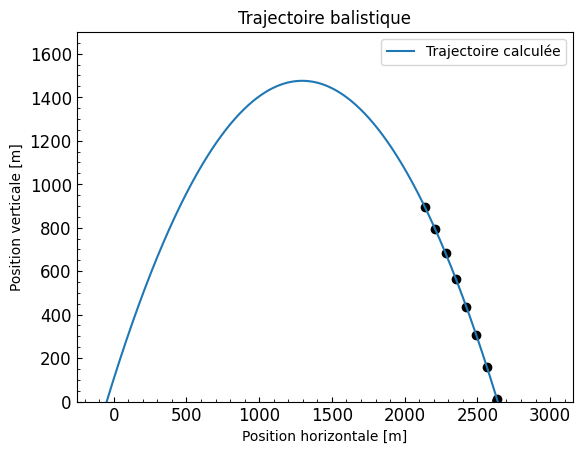

In [42]:
#a) Implémentation de l'argument "réduite=True"
def householder_qr(A, réduite): #Matrice A 
    #def de Q_i
    m, n= A.shape
    R = A
    Q_matrice = []
    for i in range(n):

        x = R[-(R.shape[0] - i) : , i]
        x = np.expand_dims(x, axis=1)
        
        norm_x= np.linalg.norm(x)
 
        signe = 1 if x[0] >= 0 else -1

        e_1 = np.array([1 if j == 0 else 0 for j in range((m - i))])
        e_1 = np.expand_dims(e_1, axis=1) #Transpose le vecteur
        v = (signe* norm_x * e_1) + x 

        H = np.eye(m - i) - 2 * (np.dot(v, np.transpose(v)) / np.dot(np.transpose(v), v))
        
        
        Q_i = np.eye(m)
        Q_i[i:, i:] = H
        
        R = np.dot(Q_i, R)
        Q_matrice.append(Q_i)
    Q=np.transpose(Q_matrice[0])
    for i in Q_matrice[1:]:
        Q = np.matmul(Q, np.transpose(i))

    if réduite:
        m, n = R.shape
        R=R[:n]
        Q = Q[:, :-(m-n)]
        return(Q,R)
    else:
        return(Q, R)
    
#A = np.array([[1,2], [3, 2], [4, 1], [6,2]])
#householder_qr(A, réduite=True)



#b)


path= os.path.abspath("bataille_navale_equipe06.csv")
xdata = pd.read_csv(path, header=0).iloc[:, 0]


x=np.zeros((8,3))

for i in range(len(xdata)):
    x[i, 0] = 1
    x[i, 1] = xdata[i]
    x[i, 2] = xdata[i]**2

Q, R = householder_qr(x, réduite=True)


n = R.shape[0]
for i in range(n):
    for j in range(n):
        if abs(R[i][j]) < 10e-10:
            R[i][j] = 0



QT=np.transpose(Q)



ydata = pd.read_csv(path, header=0).iloc[:, 1]
ydata=ydata.to_numpy()
ydata = np.expand_dims(ydata, axis=1)

QTY=np.dot(QT, ydata)



def solution_systeme(R, Y): #R est triangulaire supérieur, Y est la matrice dans la forme R*A=Y, le code itère pour trouver les valeurs de A solution
    N = R.shape[0]
    A = np.zeros((N, 1))

    A[N-1] = Y[N-1] / R[N-1, N-1]
    for i in range(N-2, -1, -1):
        A[i] = (Y[i] - np.dot(R[i, i+1:], A[i+1:])) / R[i, i]

    return A

A = solution_systeme(R, QTY)
#print(A)


#c)
l=np.linspace(-100, 3000, 10000)
Y = A[0]+A[1]*l+A[2]*l**2


plt.figure()
plt.minorticks_on()
plt.tick_params(axis="both",direction="in",labelsize='large',which='both',color='black')
plt.title("Trajectoire balistique")
plt.ylabel("Position verticale [m]")
plt.xlabel("Position horizontale [m]")
plt.plot(l, Y, label="Trajectoire calculée")
plt.scatter(xdata, ydata, color= "black")
plt.ylim(0, 1700)
plt.legend()
plt.plot()
#plt.show()

#d) Méthode de la bissection 
def fonction_Y(x):
    return(A[0]+A[1]*x+A[2]*x**2)

def bissection(xA, xB):
    xC=(xA+xB)/2
    if fonction_Y(xA)*fonction_Y(xC) > 0:
        xA=xC 
    else: 
        xB=xC
    return xA, xB, xC 

###############À zéro#######################
xA=-100
xB=0
nb=0
for i in range(1000000):
    nb += 1
    xA, xB, xC = bissection(xA,xB)
    if abs(fonction_Y(xC)) < 10e-10: 
        break
print(nb)
print(xC)
print(fonction_Y(xC))
###### Point de chute#####
xA= 2500
xB= 3000
nb=0
for i in range(1000000):
    nb += 1
    xA, xB, xC = bissection(xA,xB)
    if abs(fonction_Y(xC)) < 10e-10: 
        break
print(nb)
print(xC)
print(fonction_Y(xC))

